In [ ]:
!pip install nibabel nilearn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 38.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from nilearn import plotting
import nibabel as nib
import numpy as np
from PIL import Image, ImageFilter

In [ ]:
!wget https://openneuro.org/crn/datasets/ds003574/files/sub-01:anat:sub-01_T1w.nii.gz

!wget https://openneuro.org/crn/datasets/ds003574/files/sub-18:anat:sub-18_T1w.nii.gz

!wget https://openneuro.org/crn/datasets/ds003574/files/sub-10:anat:sub-10_T1w.nii.gz

!wget https://openneuro.org/crn/datasets/ds003574/files/sub-07:anat:sub-07_T1w.nii.gz

!wget https://openneuro.org/crn/datasets/ds003574/files/sub-05:anat:sub-05_T1w.nii.gz

--2024-11-27 04:16:27--  https://openneuro.org/crn/datasets/ds003574/files/sub-01:anat:sub-01_T1w.nii.gz
Resolving openneuro.org (openneuro.org)... 34.107.158.10
Connecting to openneuro.org (openneuro.org)|34.107.158.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3.amazonaws.com/openneuro.org/ds003574/sub-01/anat/sub-01_T1w.nii.gz?versionId=.YNOWxwZlp5vxtDTnhu36zyNyF3TXmrr [following]
--2024-11-27 04:16:27--  https://s3.amazonaws.com/openneuro.org/ds003574/sub-01/anat/sub-01_T1w.nii.gz?versionId=.YNOWxwZlp5vxtDTnhu36zyNyF3TXmrr
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.97.152, 52.217.16.46, 16.182.99.160, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.97.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11878096 (11M) [application/gzip]
Saving to: ‘sub-01:anat:sub-01_T1w.nii.gz’

sub-01:anat:sub-01_ 100%[===================>]  11.33M  22.5MB/s    in 0.5s    

2024-11-27 04:16:28 (22.5 MB

In [ ]:
# Carga el archivo .nii.gz desde Drive (ajusta la ruta al archivo)
file_path1 = '/content/sub-01:anat:sub-01_T1w.nii.gz'
file_path2 = '/content/sub-18:anat:sub-18_T1w.nii.gz'
file_path3 = '/content/sub-10:anat:sub-10_T1w.nii.gz'
file_path4 = '/content/sub-07:anat:sub-07_T1w.nii.gz'
file_path5 = '/content/sub-05:anat:sub-05_T1w.nii.gz'

nii_img1 = nib.load(file_path1)
nii_img2 = nib.load(file_path2)
nii_img3 = nib.load(file_path3)
nii_img4 = nib.load(file_path4)
nii_img5 = nib.load(file_path5)

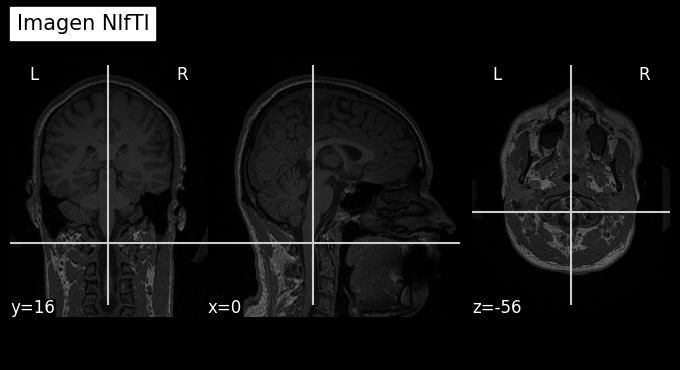

In [ ]:
# Visualización de la imagen (corte sagital)
plotting.plot_anat(nii_img1, title="Imagen NIfTI")
plt.show()

/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


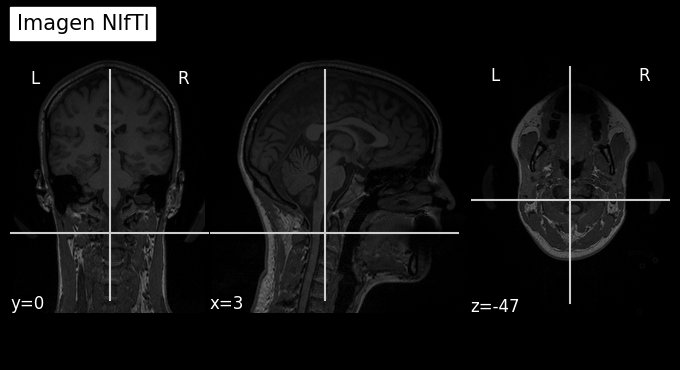

In [ ]:
plotting.plot_anat(nii_img2, title="Imagen NIfTI")
plt.show()

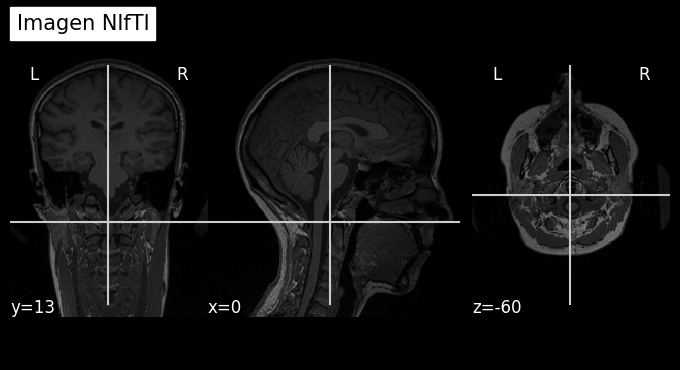

In [ ]:
plotting.plot_anat(nii_img3, title="Imagen NIfTI")
plt.show()

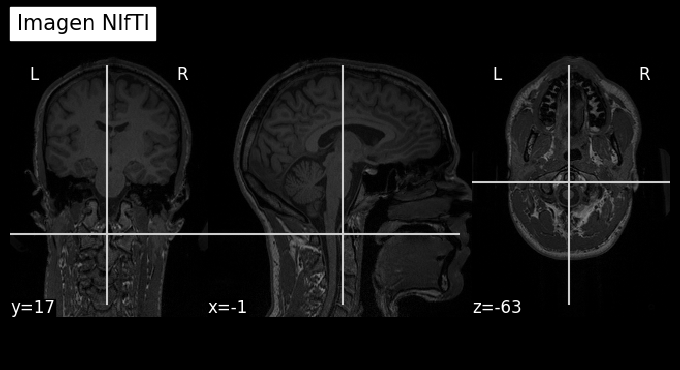

In [ ]:
plotting.plot_anat(nii_img4, title="Imagen NIfTI")
plt.show()

/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


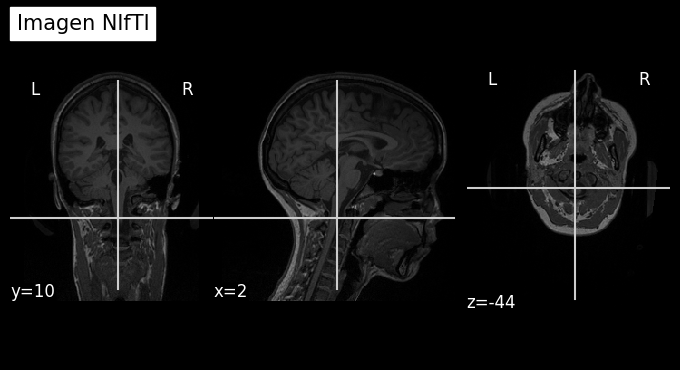

In [ ]:
plotting.plot_anat(nii_img5, title="Imagen NIfTI")
plt.show()

In [ ]:
def aplicar_filtro_logaritmico(img_data, corte=0, eje=2):
    """
    Aplica un filtro logarítmico a una imagen NIfTI y visualiza el corte seleccionado.
    Corrige la rotación de 90 grados.

    Parámetros:
    - img_data: array de NumPy con los datos de la imagen NIfTI.
    - corte: el índice del corte que deseas visualizar (predeterminado es 0).
    - eje: el eje sobre el cual se desea hacer el corte (0, 1 o 2; predeterminado es el eje 2).
    """
    # Normaliza los valores entre 0 y 1
    img_data_normalized = (img_data - np.min(img_data)) / (np.max(img_data) - np.min(img_data))

    # Aplica el filtro logarítmico
    img_data_log = np.log1p(img_data_normalized)

    # Extrae el corte en el eje especificado
    if eje == 0:
        slice_data = img_data_log[corte, :, :]
    elif eje == 1:
        slice_data = img_data_log[:, corte, :]
    else:
        slice_data = img_data_log[:, :, corte]

    # Corrige la rotación con una transposición
    slice_data = np.rot90(slice_data)

    return slice_data

In [ ]:
img_data1 = nii_img1.get_fdata()
img_data2 = nii_img2.get_fdata()
img_data3 = nii_img3.get_fdata()
img_data4 = nii_img4.get_fdata()
img_data5 = nii_img5.get_fdata()


In [ ]:
img_data1_log = aplicar_filtro_logaritmico(img_data1, corte=100, eje=0)
img_data2_log = aplicar_filtro_logaritmico(img_data2, corte=100, eje=0)
img_data3_log = aplicar_filtro_logaritmico(img_data3, corte=100, eje=0)
img_data4_log = aplicar_filtro_logaritmico(img_data4, corte=100, eje=0)
img_data5_log = aplicar_filtro_logaritmico(img_data5, corte=100, eje=0)


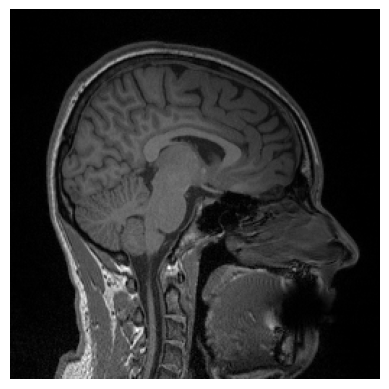

In [ ]:
plt.imshow(img_data1_log, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
from scipy.ndimage import convolve

def aplicar_filtro_afilado(img_data):
    """
    Aplica un filtro de afilamiento a una imagen NIfTI y visualiza el corte seleccionado.

    Parámetros:
    - img_data: array de NumPy con los datos de la imagen NIfTI.
    """

     # Kernel de afilamiento suave para preservar detalles
    kernel_afilado_suave = np.array([[0, -0.5, 0],
                                     [-0.5, 3, -0.5],
                                     [0, -0.5, 0]])

    # Aplica la convolución (afilado) a la imagen
    slice_afilado = convolve(img_data, kernel_afilado_suave)

    # Normaliza la imagen afilada para evitar sobresaturación
    slice_afilado = (slice_afilado - np.min(slice_afilado)) / (np.max(slice_afilado) - np.min(slice_afilado))

    return slice_afilado

In [ ]:
img_data_afilado = aplicar_filtro_afilado(img_data1_log)

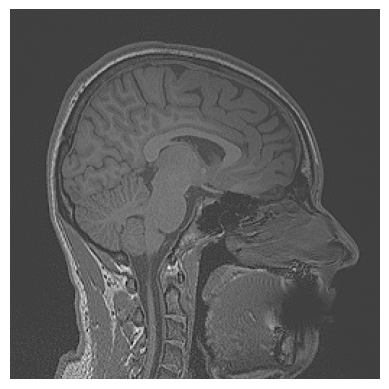

In [ ]:
plt.imshow(img_data_afilado, cmap='gray')
plt.axis('off')
plt.show()

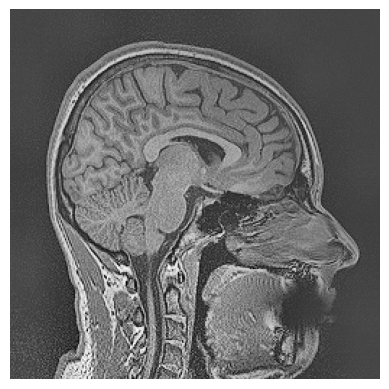

In [ ]:
import cv2

def aplicar_clahe(img_data):
  """
  Aplica un filtro CLAHE a una imagen.

  Parámetros:
  - img_data: array de NumPy con los datos de la imagen.
  """

  # Convertir la imagen a 8 bits sin signo (requerido por CLAHE)
  img_data_uint8 = (img_data * 255).astype(np.uint8)

  # Crear un objeto CLAHE
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

  # Aplicar CLAHE
  img_data_clahe = clahe.apply(img_data_uint8)

  return img_data_clahe


img_data4_clahe = aplicar_clahe(img_data_afilado)

plt.imshow(img_data4_clahe, cmap='gray')
plt.axis('off')
plt.show()

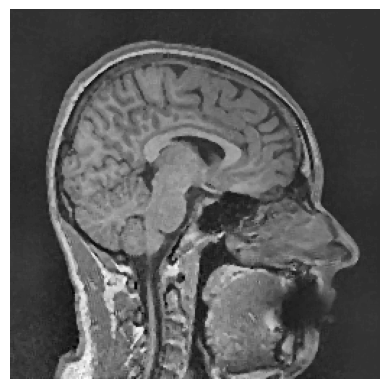

In [ ]:
from scipy.ndimage import median_filter

# Crear una imagen de ejemplo (una matriz de 2D con valores aleatorios)
image = img_data4_clahe

# Aplicar el filtro de mediana
filtered_image = median_filter(image, size=3)

plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()

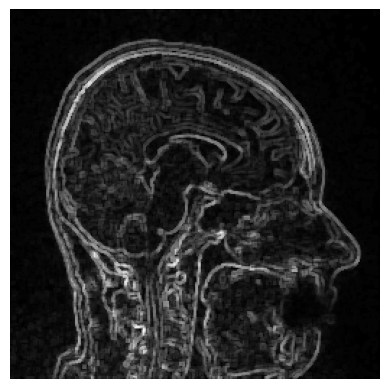

In [ ]:
import cv2
import matplotlib.pyplot as plt

def apply_morphological_gradient(image, kernel_size=3):
    """
    Aplica la Transformada de Gradiente Morfológico a una imagen.

    Args:
        image (numpy.ndarray): Imagen en escala de grises.
        kernel_size (int): Tamaño del kernel estructurante.

    Returns:
        numpy.ndarray: Imagen procesada con gradiente morfológico.
    """
    # Crear un elemento estructurante rectangular
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

    # Aplicar gradiente morfológico
    morph_gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    return morph_gradient


gradient = apply_morphological_gradient(filtered_image, kernel_size=3)

plt.imshow(gradient, cmap='gray')
plt.axis('off')
plt.show()


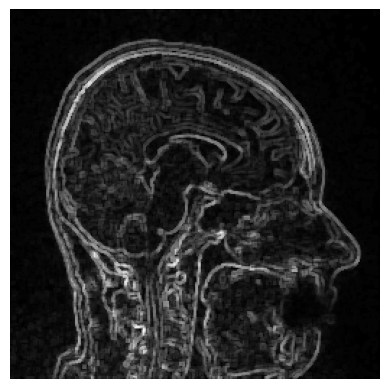

In [ ]:
def pipeline_filtros(img_data, corte=100, eje=0):
    """
    Pipeline que aplica una serie de filtros a una imagen NIfTI.
    """
    # 1. Filtro logarítmico
    img_log = aplicar_filtro_logaritmico(img_data, corte, eje)

    # 2. Filtro de afilado
    img_afilada = aplicar_filtro_afilado(img_log)

    # 3. CLAHE
    img_clahe = aplicar_clahe(img_afilada)

    # 4. Filtro de mediana
    img_mediana = median_filter(img_clahe, size=3)

    # 5. Gradiente morfológico
    img_gradiente = apply_morphological_gradient(img_mediana, kernel_size=3)

    return img_gradiente


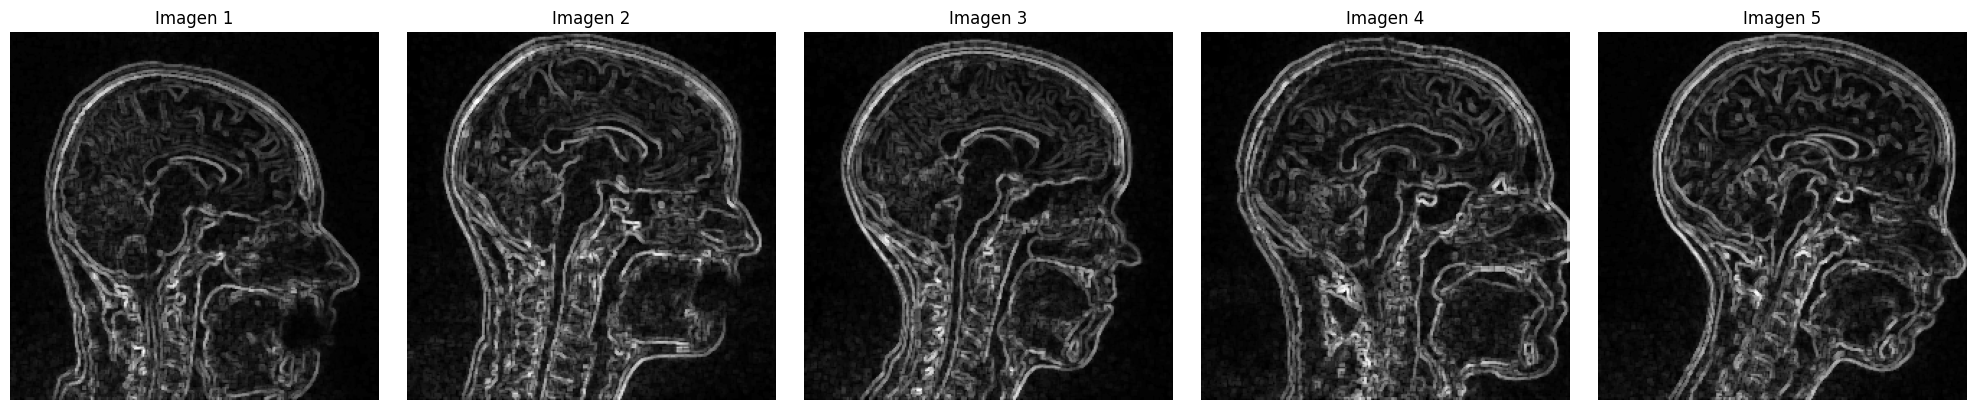

In [ ]:
import matplotlib.pyplot as plt



fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 fila, 5 columnas

# Aplica el pipeline a cada imagen y muestra en cada subplot
imagenes = [img_data1, img_data2, img_data3, img_data4, img_data5]
for i, img_data in enumerate(imagenes):
    imagen_procesada = pipeline_filtros(img_data)
    axes[i].imshow(imagen_procesada, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Imagen {i+1}')

plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()